## - 18. According to the VC inequality, how can we calculate the necessary number of samples to guarantee a certain precision, with probability 0.9, for example?

The sample complexity denotes how many training examples $N$ are needed to achience a certain generalization performance, which is specified by two parameters: $\epsilon$ and $\delta$. The tolerance error $\epsilon$ determines the allowed generalization error and the confidence paramter $\delta$ determines how often the error tolerance $\epsilon$ is violated. Observing how fast $N$ grows as $\epsilon$ and $\delta$ become smaller shows us how much data is needed to get good generalization.

We can estimate the sample complexity using the VC bound:

\begin{align} \label{eq:samp1}
    N \geq \frac{8}{\epsilon^2}\ln \left(\frac{4m_{\mathcal{H}}(2N)}{\delta}\right)
\end{align}

Replacing the growth function by its polynomial upper bound (based on the VC dimension) in the above equation we get:

\begin{align} \label{eq:samp2}
    N \geq \frac{8}{\epsilon^2}\ln \left(\frac{4((2N)^{d_{\text{VC}}}+1)}{\delta}\right).
\end{align}

Both bounds are implicit, because $N$ appears on both sides of the inequality. For this reason, iterative methods are used to obtain numerical values for $N$. 

With a probability of 0.9, we have the confidence parameter $\delta = 0.1$. We would also need to consider the VC dimension of the learning model and a certain tolerance error $\epsilon$. Using the second inequality, we calculate the RHS with these values, starting with an initial guess for $N$. Using the value obtained on the RHS as the new $N$, we recalculate the RHS iteratively until it converges to the final value. 

Let's try out this iterative algorithm: I calculate $N$ using the values seen in the script and plot the values of $N$ at each iteration. $N$ converges to approximately 40,000.

Final N: 38997.155277614496


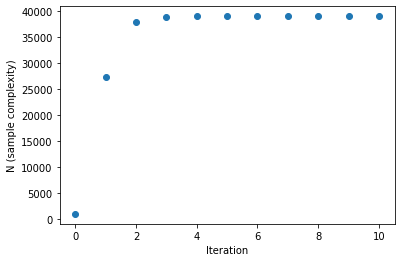

In [49]:
import numpy as np
import matplotlib.pyplot as plt


delta = 0.1 #confidence parameter considering P = 0.9
epsilon = 0.1 #tolerance error
d_vc = 4 #VC dimension
iterations = 10 #number of iterations
Ns = np.empty(iterations+1) #Array to recieve values of N throughout all iterations
Ns[0] = 1000 #this will be our initial guess for N
#Iteratively calculate N
for i in range(1,iterations+1):
    Ns[i] = (8/(epsilon**2))*np.log((4*(((2*Ns[i-1])**d_vc)+1))/delta)

print("Final N:", Ns[10])
x = np.arange(11)
plt.scatter(x, Ns)
plt.xlabel("Iteration")
plt.ylabel("N (sample complexity)")
plt.show()